## 3차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [121]:
# %pip install praw

1.2 라이브러리 설정

In [122]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [123]:
# nltk.download('punkt')
# nltk.download('stopwords')

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [130]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='x',
    client_secret='x',
    user_agent='x'
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [131]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [132]:
Title = []
Text = []
count = 0

for tp in top_posts:
    if count >= 100:
        break
    Title.append(tp.title)
    Text.append(tp.selftext)
    count += 1

In [133]:
df = pd.DataFrame({
    'Title': Title,
    'Text': Text
})

In [134]:
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [104]:
# 토큰화
Token = df['Text'].apply(lambda x: word_tokenize(x.lower())).tolist()

# 불용어 제거
bull = set(stopwords.words('english'))
Token2 = [[word for word in tokens if word not in bull] for tokens in Token]
toklist = [word for tokens in Token2 for word in tokens]

# 특수문자 제거
toklist2 = [re.sub(r'[^a-zA-Z]', '', word) for word in toklist]

# 빈 문자열 제거
toklist2 = [word for word in toklist2 if word]

In [171]:
# toklist2

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_count = Counter(toklist2)

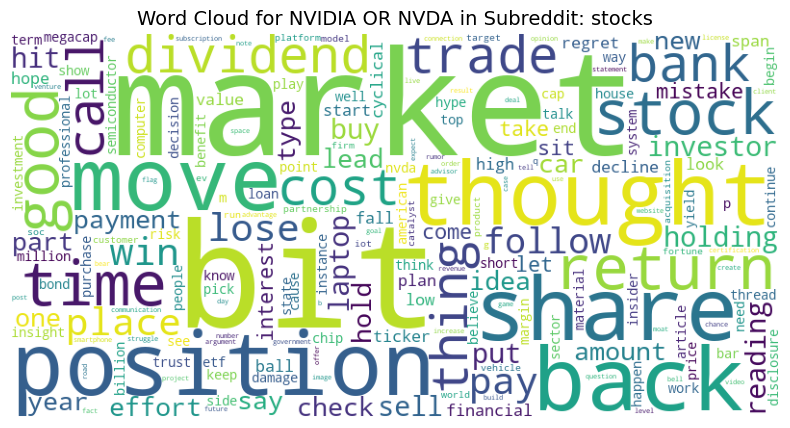

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_count))

# 플롯 설정
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')

# 제목 설정
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
plt.title(f'Word Cloud for {search_query} in Subreddit: {subreddit_name}', fontsize=14)

# 플롯 표시
plt.show()

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [108]:
top = word_count.most_common(20)
word, count = zip(*top)

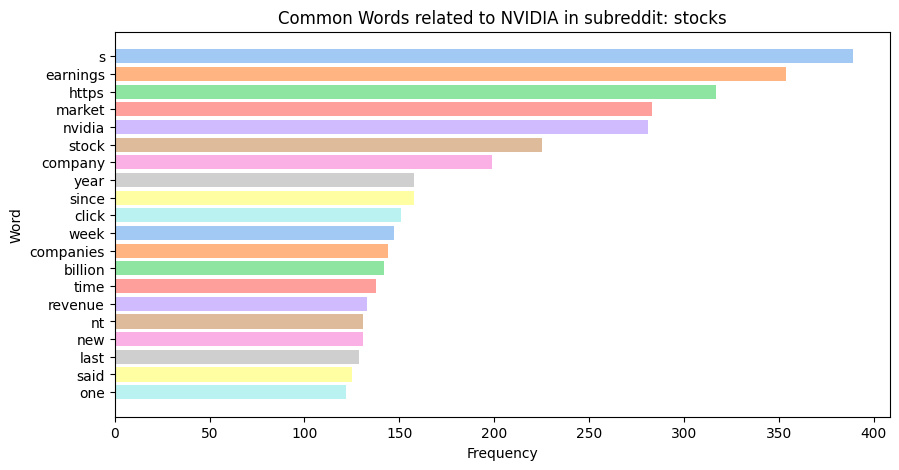

In [109]:
import seaborn as sns

colors = sns.color_palette('pastel', len(word))

plt.figure(figsize=(10, 5))
plt.barh(word, count, color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다.  
추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요.  
게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나  
또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [110]:
df

,Title,Text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


In [111]:
# %pip install textblob

In [166]:
import pandas as pd
import praw
from datetime import datetime
from textblob import TextBlob

subreddit_name = 'all'
search_query = 'Netflix'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=3000, sort='top')

Title = []
Text = []
Created_utc = [] # 작성 시간
count = 0

for tp in top_posts:
    if count >= 3000:
        break
    Title.append(tp.title)
    Text.append(tp.selftext)
    Created_utc.append(datetime.utcfromtimestamp(tp.created_utc))
    count += 1

df = pd.DataFrame({
    'Title': Title,
    'Text': Text,
    'Created_utc': Created_utc,
})

# 2020년부터 2023년까지의 데이터만 필터링
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)
df = df[(df['Created_utc'] >= start_date) & (df['Created_utc'] <= end_date)]

# 작성한 달 추출
df['Month'] = df['Created_utc'].dt.to_period('M')

# 데이터프레임 확인
print(df.head())

                                               Title Text         Created_utc  \
1                       What the actual fuck netflix      2020-08-20 23:10:24   
2               Netflix be following them everywhere      2020-08-23 09:18:10   
3  Yeah, nobody is going to change their gaming t...      2020-03-21 12:07:51   
4  US Military Could Lose Space Force Trademark t...      2020-06-08 14:02:37   
5                                   Dear Netflix....      2020-05-29 18:39:37   

     Month  
1  2020-08  
2  2020-08  
3  2020-03  
4  2020-06  
5  2020-05  


In [167]:
len(df)

109

3000개 불러오는거로 했는데 지정년도에서 관련 글이 109개라 해당 갯수로 불러온것으로 보임

In [168]:
# 감성 분석 함수 정의
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# 텍스트 데이터에 대해 감성 분석 수행
df['Sentiment'] = df['Text'].apply(analyze_sentiment)

# 데이터프레임 확인
print(df.head())

                                               Title Text         Created_utc  \
1                       What the actual fuck netflix      2020-08-20 23:10:24   
2               Netflix be following them everywhere      2020-08-23 09:18:10   
3  Yeah, nobody is going to change their gaming t...      2020-03-21 12:07:51   
4  US Military Could Lose Space Force Trademark t...      2020-06-08 14:02:37   
5                                   Dear Netflix....      2020-05-29 18:39:37   

     Month  Sentiment  
1  2020-08        0.0  
2  2020-08        0.0  
3  2020-03        0.0  
4  2020-06        0.0  
5  2020-05        0.0  


감성 분석을 수행하는 방법 중 하나는 TextBlob 라이브러리를 사용하는 것입니다.  
TextBlob은 텍스트의 감성을 분석하고, 감성 점수를 반환합니다.   
감성 점수는 -1에서 1 사이의 값으로, -1은 매우 부정적, 1은 매우 긍정적, 0은 중립을 의미합니다.

## 월별로 관측

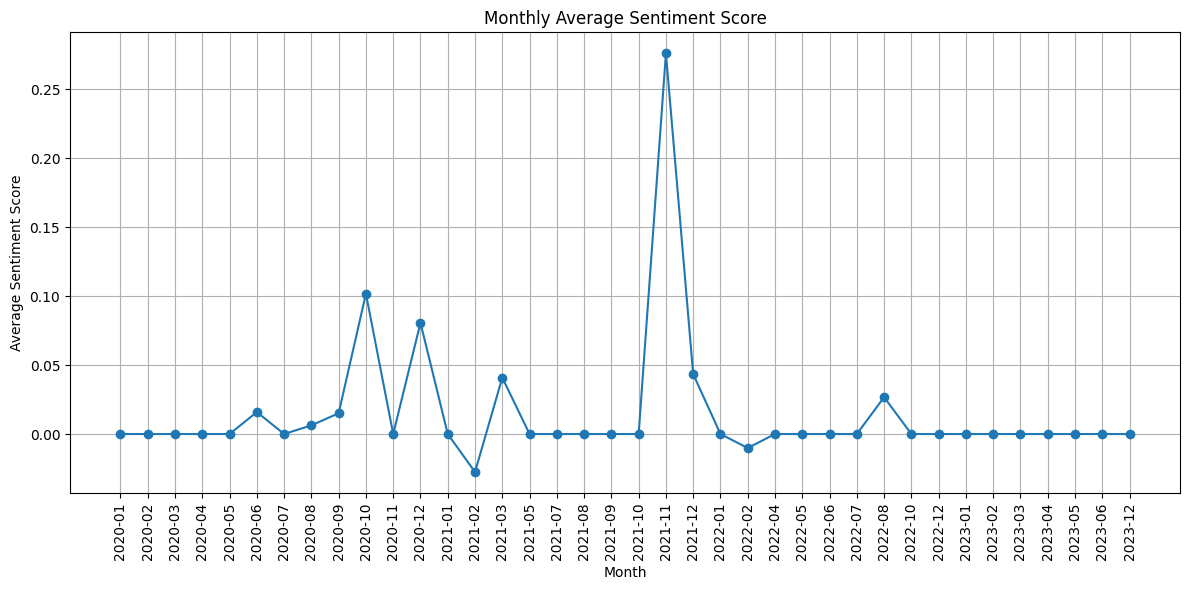

In [169]:
import matplotlib.pyplot as plt

# 달별로 감성 점수 평균 계산
monthly_sentiment = df.groupby('Month')['Sentiment'].mean().reset_index()

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['Month'].astype(str), monthly_sentiment['Sentiment'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.title('Monthly Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

감성분석한 내용을 시각화 했을때 21.10 -> 21.11 과정에서 감성점수가 크게 오르는 모습을 확인할수 있다.

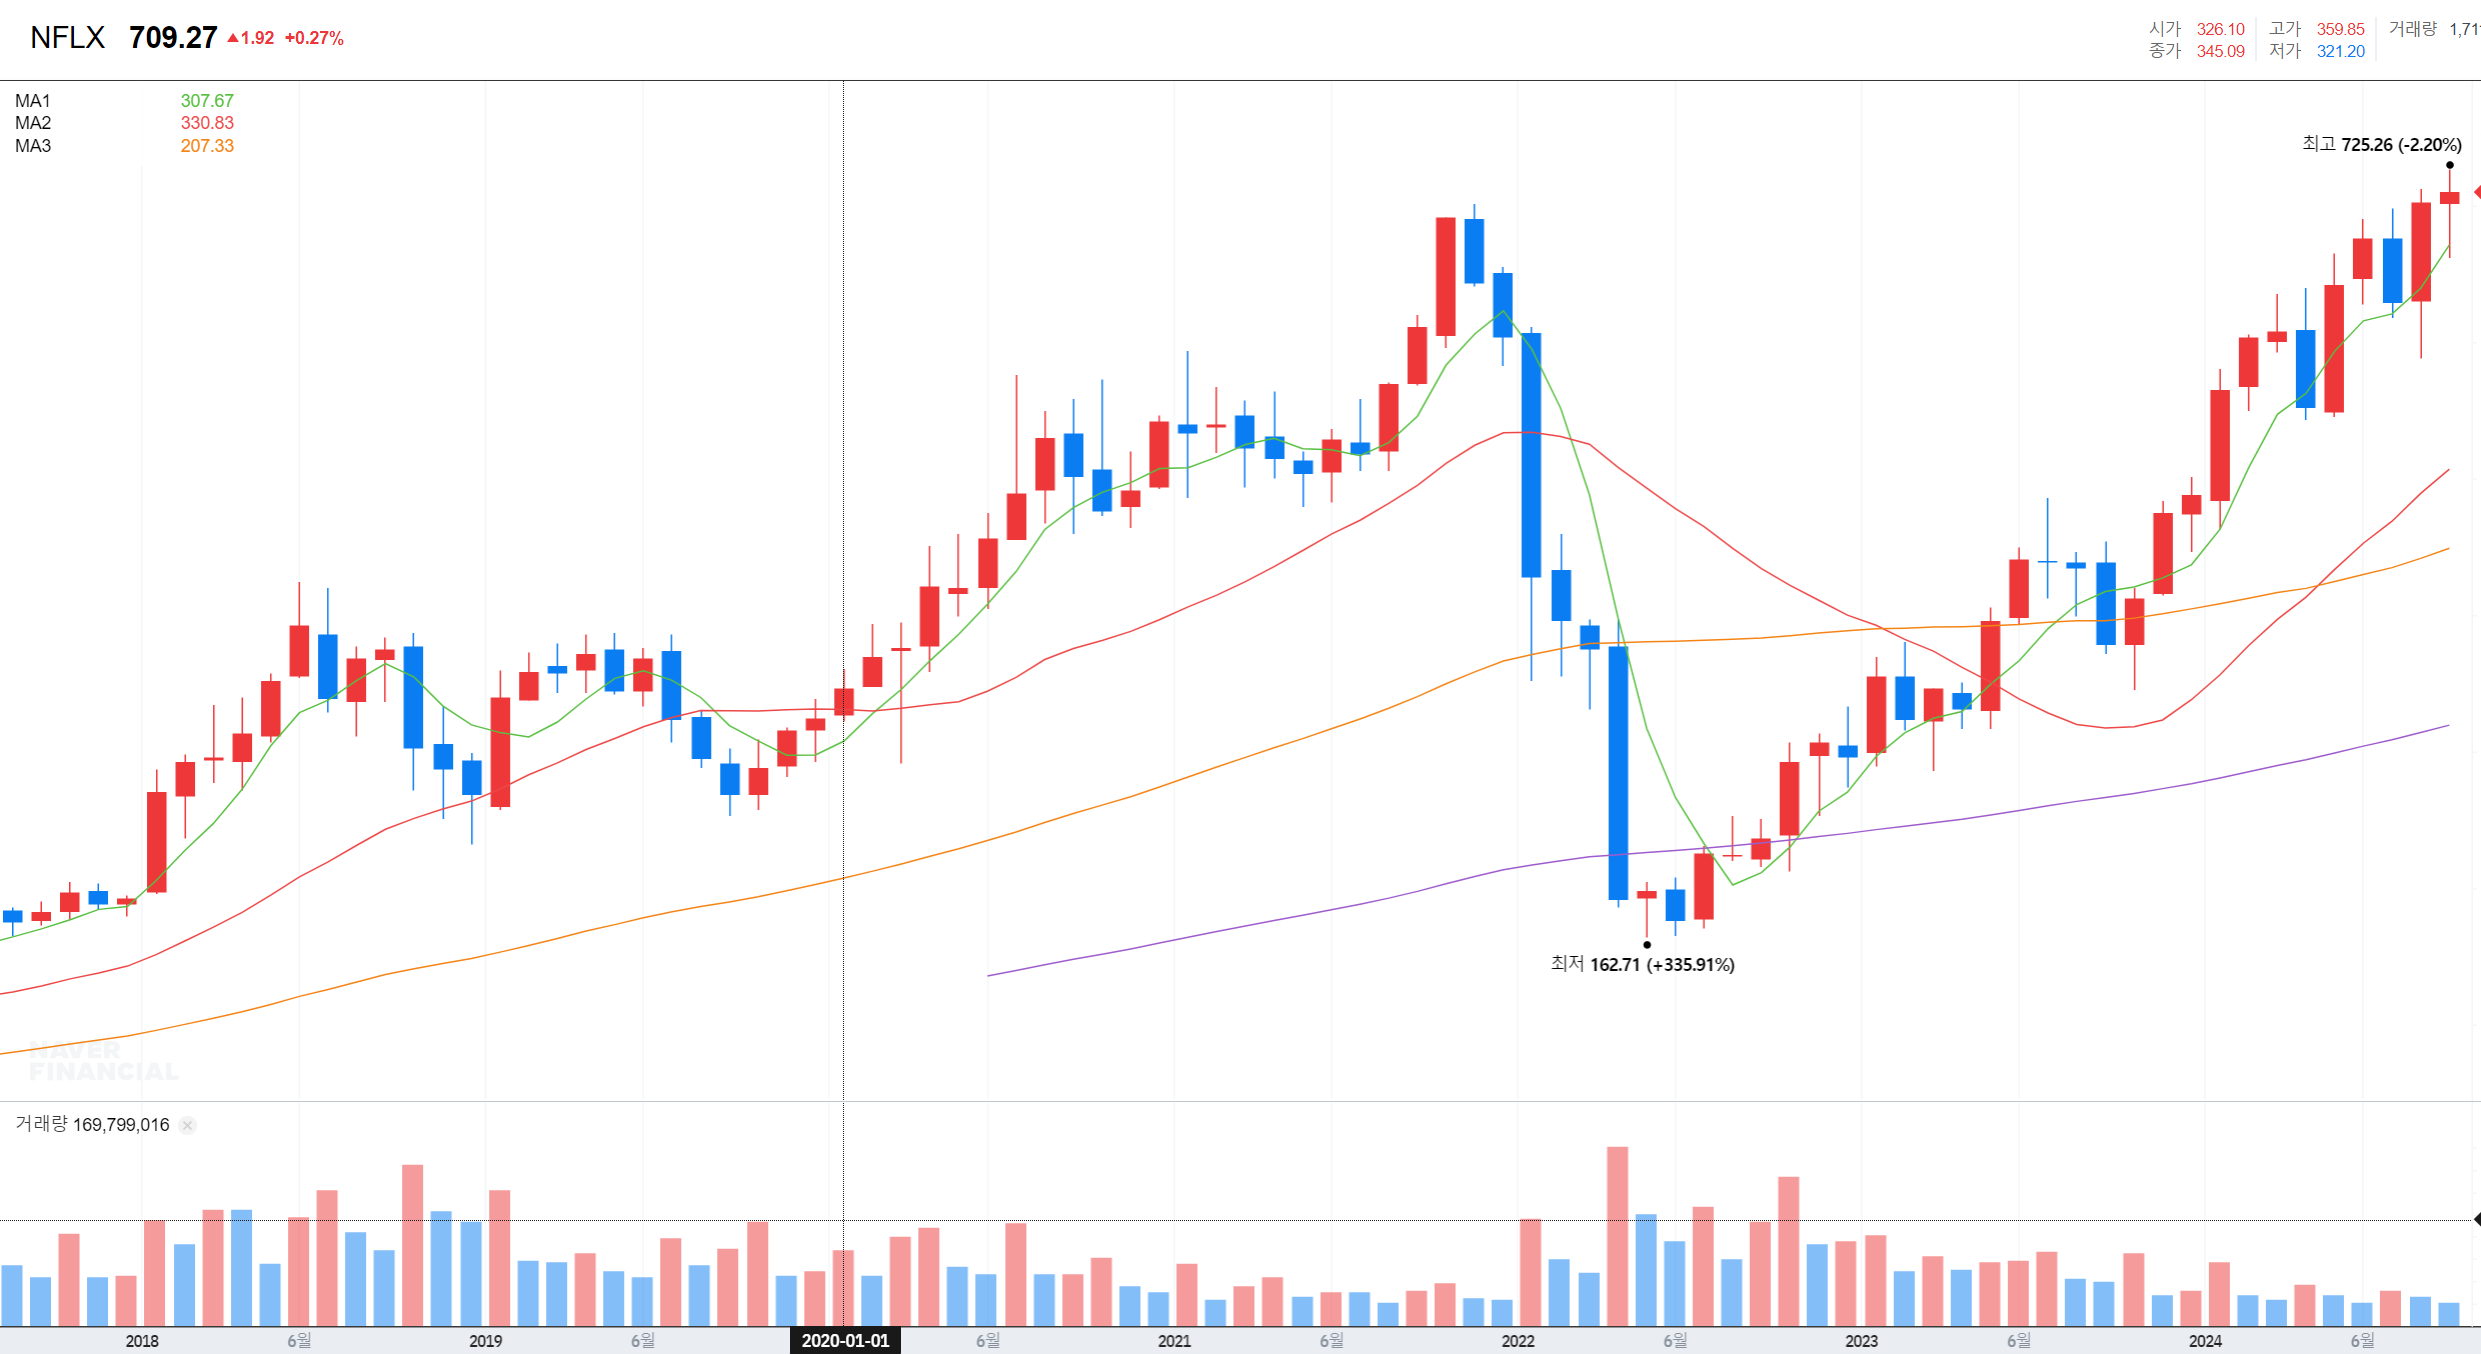

커뮤니티의 감성분석과 주식과의 관련성을 살펴봄으로서 비교의 유의미함을 확인한다.

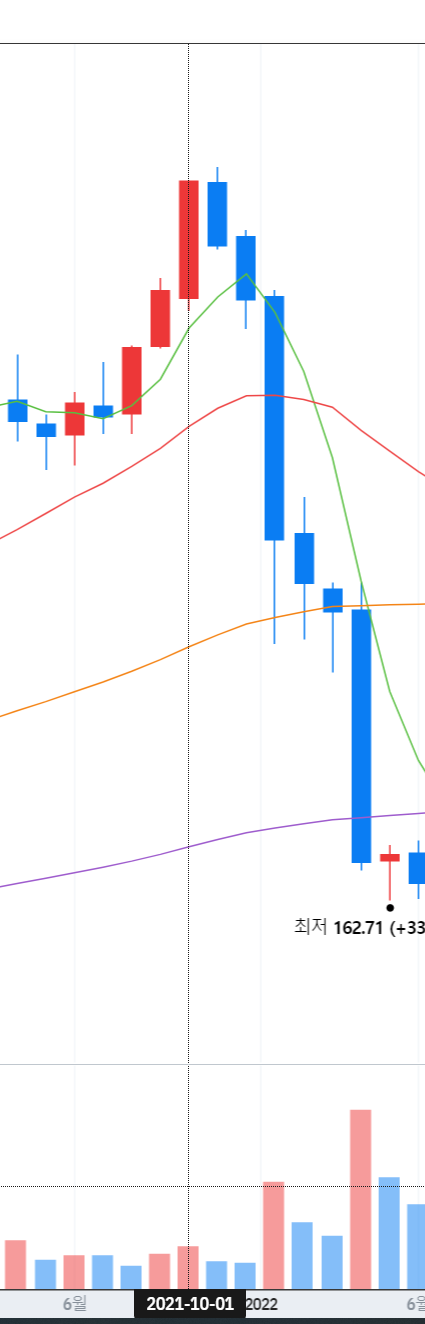

감성분석한 내용을 시각화 했을때 21.10 -> 21.11 과정에서 감성점수가 크게 오르는 모습을 확인하였다.  
주가 그래프에서 해당 년도를 확인하였을때 장대양봉이 나왔음을 확인할수 있다.    

이러한 부분에 있어 주가와 여론의 반응은 관련있다 할수 있다.(당연할수도 있지만..)  

## 분기별로 관측

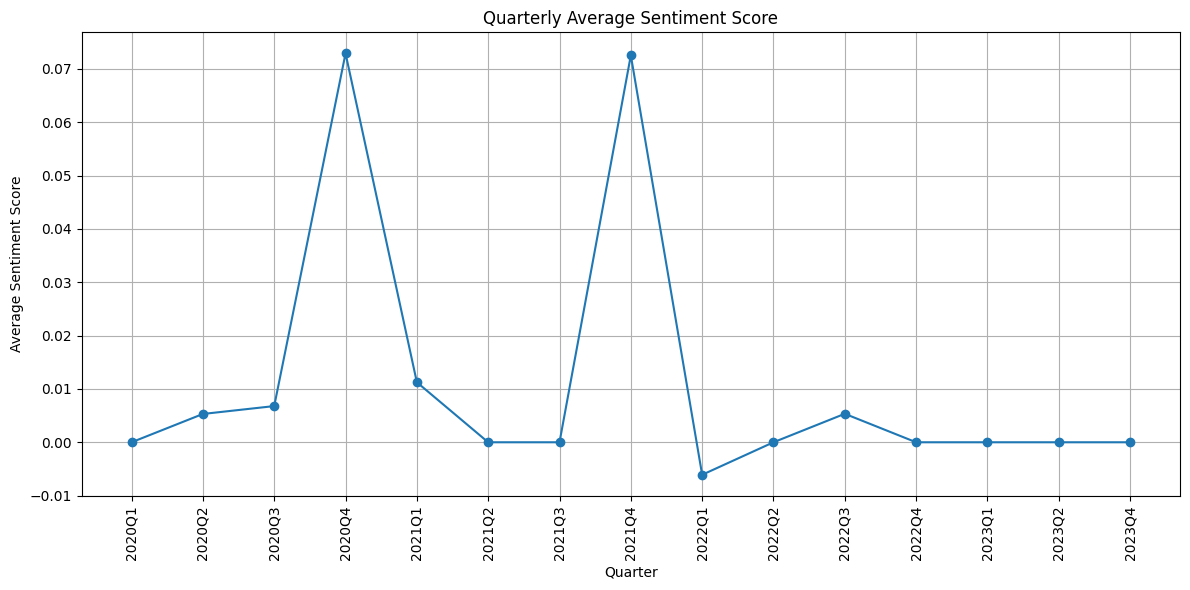

In [170]:
import matplotlib.pyplot as plt

# 분기 정보 추출
df['Quarter'] = df['Created_utc'].dt.to_period('Q')

# 분기별로 감성 점수 평균 계산
quarterly_sentiment = df.groupby('Quarter')['Sentiment'].mean().reset_index()

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sentiment['Quarter'].astype(str), quarterly_sentiment['Sentiment'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment Score')
plt.title('Quarterly Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

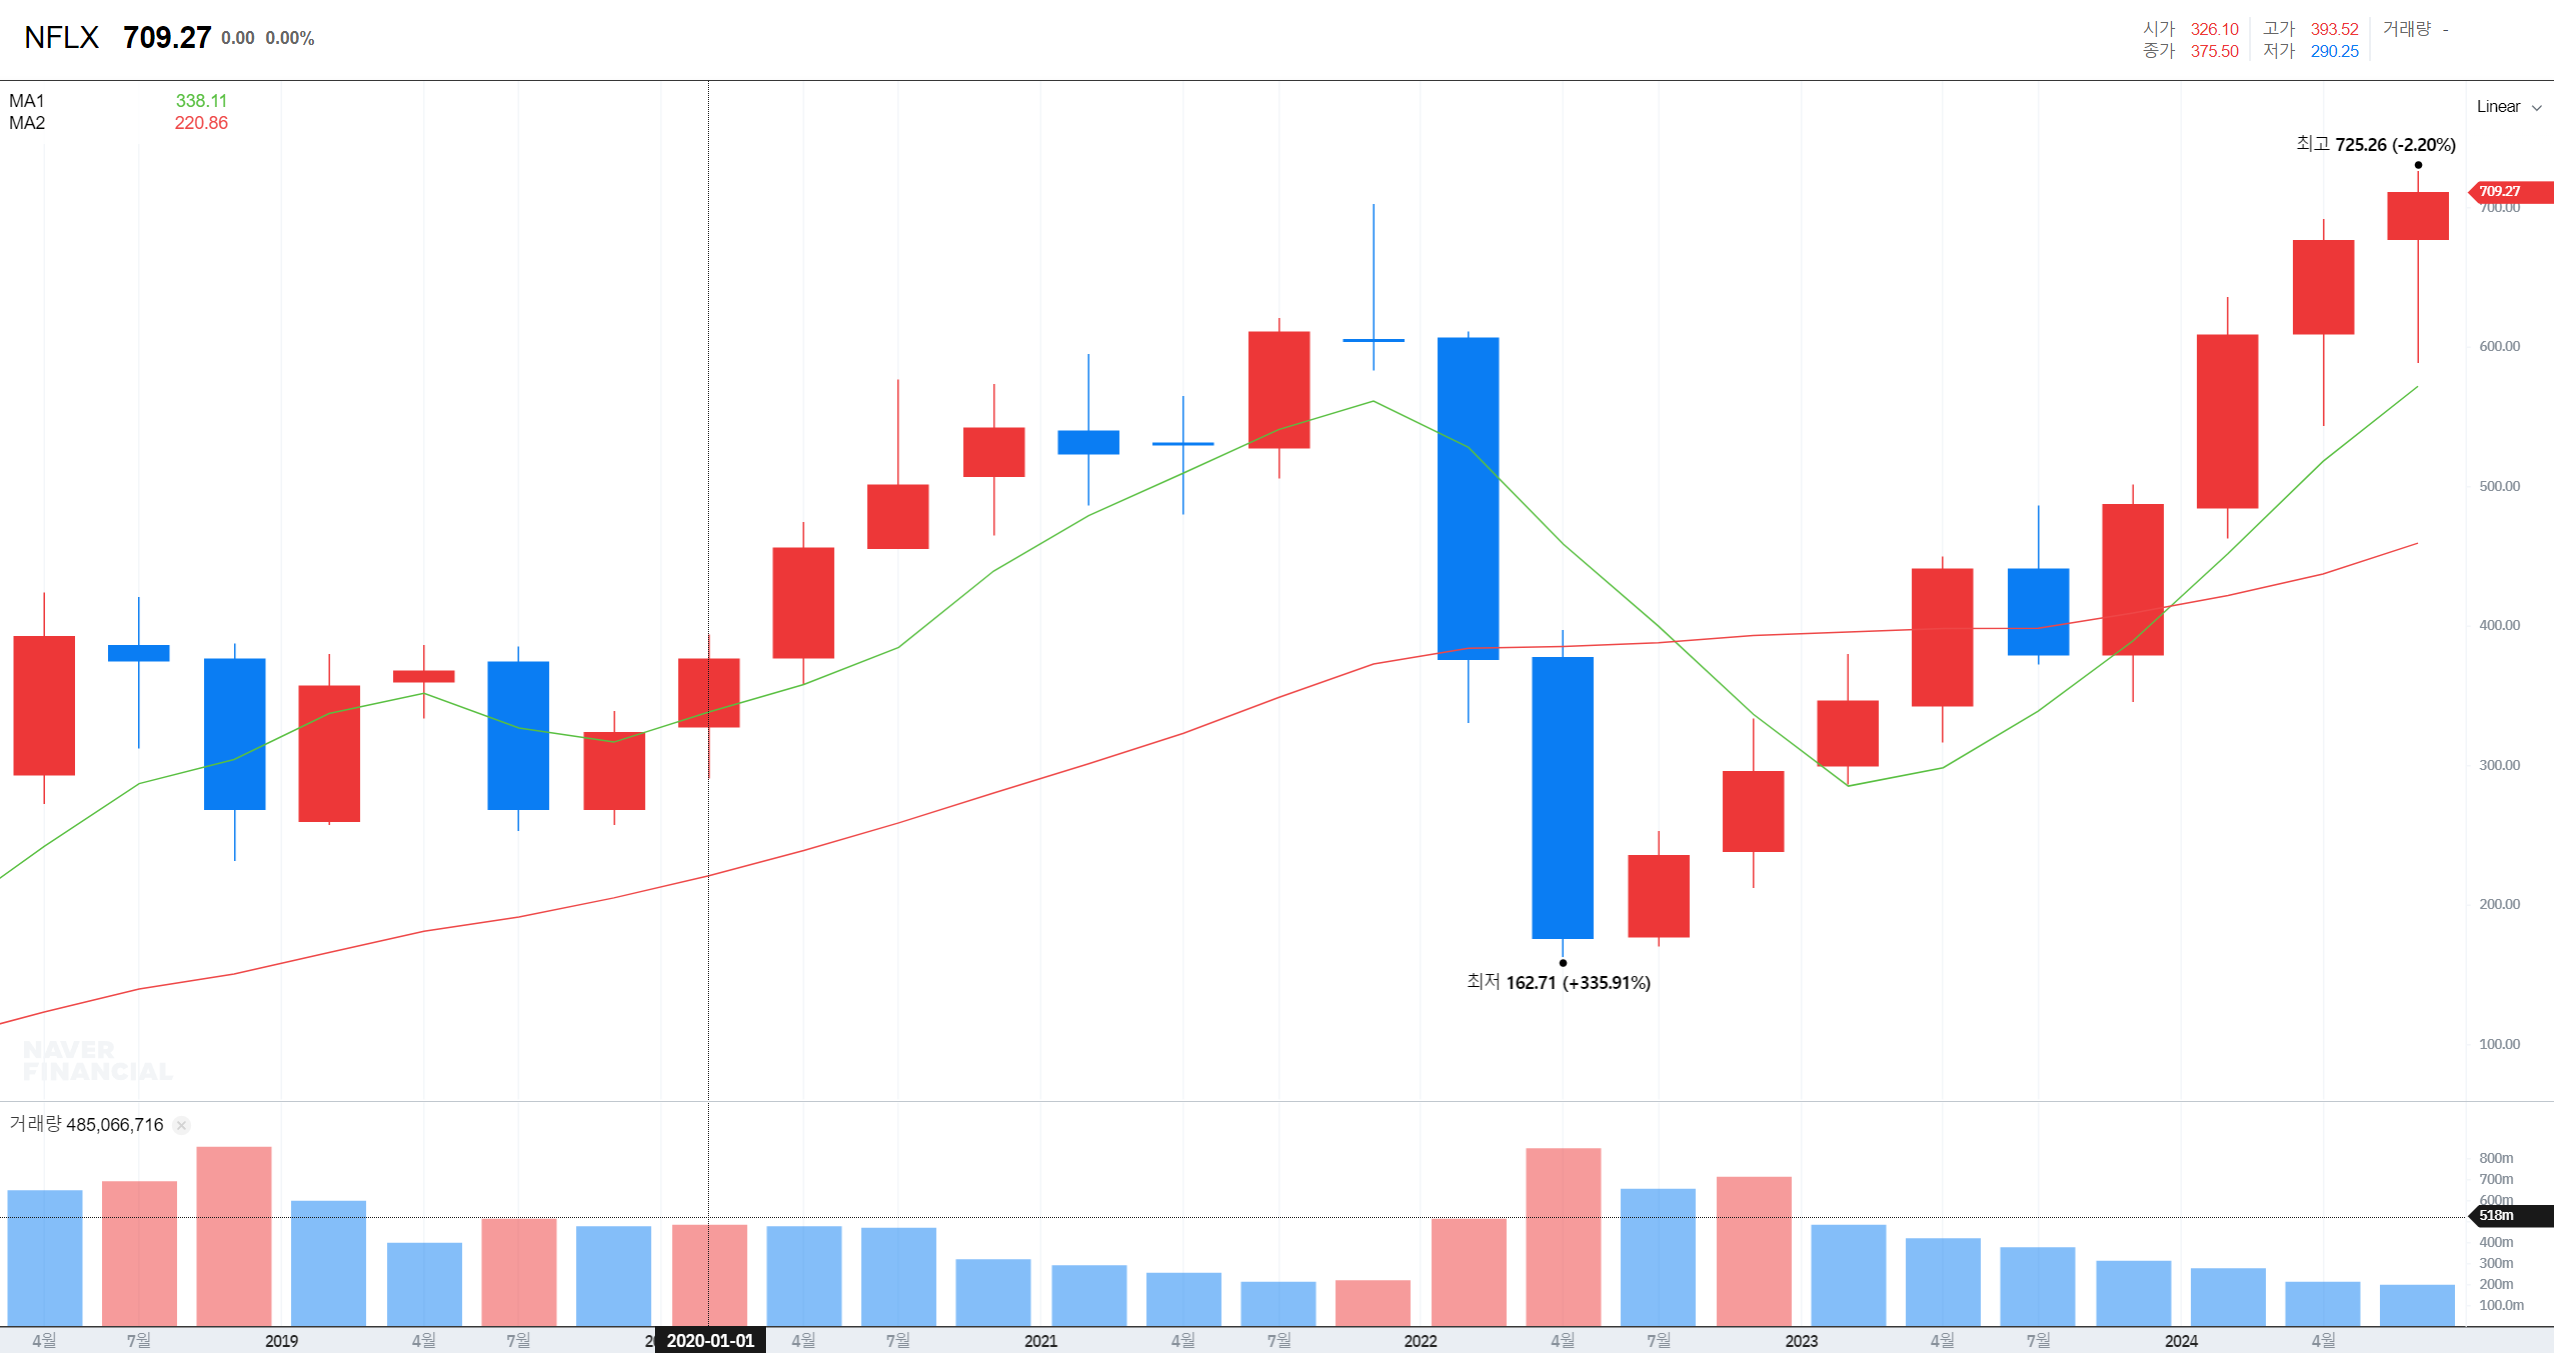

분기별로 봤을때는 크게 주가와 관련이 있는점을 찾기 어렵다.

.